# Linear Regression by Gradient Descent

We have seen how to fit a line to data by solving the normal equations. 

The other way to do it is to combine the two lessons we have learned so far: 

* fitting a line is equivalent to minimizing an error function of the parameters of the line 
* minimization can be done iteratively by following the gradient of the error function downhill (gradient descent)

In [1]:
# this will help us plot things nicely
def plot_data_and_line(a, b):
    XX = np.linspace(-10,10,200).reshape((-1,1))
    YY = f(a,b,XX)

    plt.scatter(heights, weights, alpha=0.2)
    plt.plot(XX,YY,"r")
    plt.show()

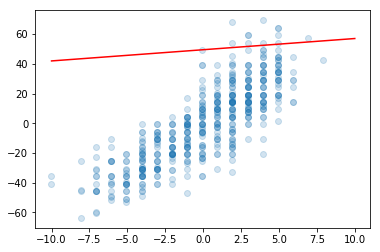

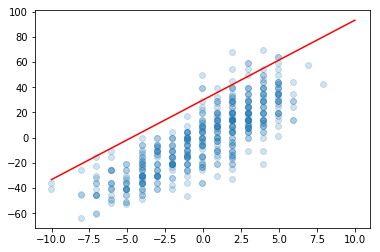

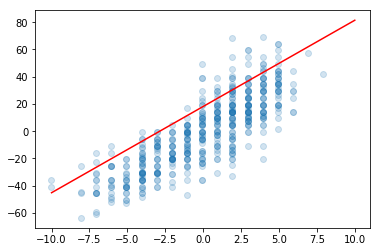

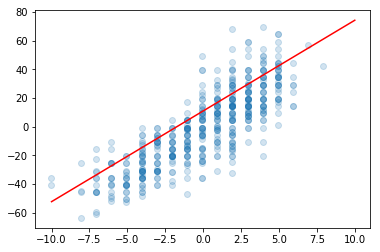

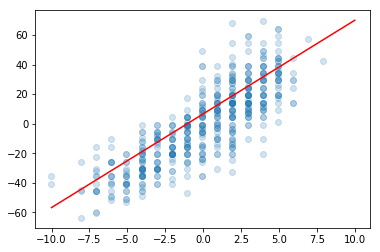

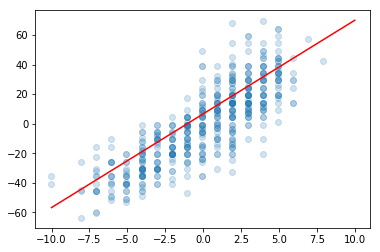

('final error: ', 275.23544769108003)


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# NBA players dataset
# (very similar to the EPL data set we looked at before)
with open('nba_data.csv', 'r') as f:
    reader = csv.reader(f)
    data_list = list(reader)

# one less because first row of csv file contains column labels
N = len(data_list) - 1

# set up empty arrays to store relevant columns
heights = np.zeros(N)
weights = np.zeros(N)
ages = np.zeros(N)

# fill arrays
for i in range(1,N+1):
    heights[i-1] = data_list[i][2]
    weights[i-1] = data_list[i][3]
    ages[i-1] = data_list[i][4]

# means
heights_mean = np.mean(heights)
weights_mean = np.mean(weights)
ages_mean = np.mean(ages)
    
# center the data about zero
heights = heights - heights_mean
weights = weights - weights_mean
ages = ages - ages_mean
    
# this is our model, weight is a linear function of height and age
def f(a, b, x):
    return a * x + b

# total error on the whole data set
def error_on_data(a, b):
    return sum([(f(a, b, heights[i]) - weights[i])**2 
                for i in range(N)]) / N

# numerical partial derivatives
h = 0.0000001
def numdela(fu):
    return (lambda a,b: (fu(a + h, b) - fu(a, b)) / h)
def numdelb(fu):
    return (lambda a,b: (fu(a, b + h) - fu(a, b)) / h)

eta = 0.005  # learning rate
num_steps = 201

a = 0.0
b = 50.0
error_amounts = []
for i in range(num_steps):
    error_amounts.append(error_on_data(a,b))
    da, db = numdela(error_on_data)(a,b), numdelb(error_on_data)(a,b)
    a = a - eta * da
    b = b - eta * db
    if i % 50 == 0:
        plot_data_and_line(a,b)
    
plot_data_and_line(a,b)
    
print("final error: ", error_on_data(a,b))

### Let's do the same thing, but using both weight and age as the dependent variables

In [7]:
# import numpy as np
# import csv
# import matplotlib.pyplot as plt

# # load data
# with open('nba_data.csv', 'r') as f:
#     reader = csv.reader(f)
#     data_list = list(reader)

# # one less because first row of csv file is labels
# N = len(data_list) - 1

# heights = np.zeros(N)
# ages = np.zeros(N)
# weights = np.zeros(N)

# refill heights ages weights arrays because they were changed previously
for i in range(1, N+1):
    heights[i-1] = data_list[i][2]
    ages[i-1] = data_list[i][4]
    weights[i-1] = data_list[i][3]
    
# this is our model, weight is a linear function of height and age
def f(a, b, c, height, age):
    return a*height + b*age + c

# numerical partial derivatives
h = 0.00001
def numdela(fu):
    return (lambda a,b,c: (fu(a+h,b,c)-fu(a,b,c))/h)
def numdelb(fu):
    return (lambda a,b,c: (fu(a,b+h,c)-fu(a,b,c))/h)
def numdelc(fu):
    return (lambda a,b,c: (fu(a,b,c+h)-fu(a,b,c))/h)

# total error on the whole data set
def error_on_data(a,b,c):
    return sum([(f(a,b,c, heights[i], ages[i]) - weights[i])**2 for i in range(N)])

eta = 0.000000001  # learning rate
num_steps = 500

a = 0.0
b = 0.0
c = 0.0
error_amounts = []
for i in range(num_steps):
    error_amounts.append(error_on_data(a,b,c))
    a -= eta * numdela(error_on_data)(a,b,c)
    b -= eta * numdelb(error_on_data)(a,b,c)
    c -= eta * numdelc(error_on_data)(a,b,c)
    
print("final error: ", error_on_data(a,b,c))

('final error: ', 221739.5696635221)


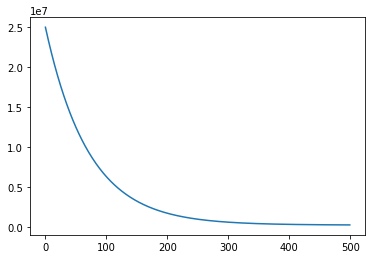

In [8]:
plt.plot(range(num_steps), error_amounts)
plt.show()